# Understanding sequential data

## What is sequential data?

Sequential data refers to data where the ordering is important. Time-series data is a particular manifestation of sequential data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
def read_data(input_file, index):
    # Read the data from the input file
    input_data = np.loadtxt(input_file, delimiter=',')
    
    # Lambda function to convert strings to pandas data format
    to_date = lambda x, y: str(int(x)) + '-' + str(int(y))
    
    # Extract the start date
    start = to_date(input_data[0, 0], input_data[0, 1])
    
    # Extract the end date
    if input_data[-1, 1] == 12:
        year = input_data[-1, 0] + 1
        month = 1
    else:
        year = input_data[-1, 0]
        month = input_data[-1, 1] + 1
    end = to_date(year, month)
    
    # Create a date list with a monthly frequency
    date_indices = pd.date_range(start, end, freq='M')
    
    # Add timestamps to the input data to create time-series data
    output = pd.Series(input_data[:, index], index=date_indices)
    
    return output

In [8]:
input_file = 'data_2D.txt'

In [10]:
# Specify the columns that need to be converted into time-series data
indices = [2, 3]

1900-01-31    97.91
1900-02-28    86.80
1900-03-31     3.56
1900-04-30     7.22
1900-05-31    46.78
Freq: M, dtype: float64
1900-01-31    73.28
1900-02-28    63.82
1900-03-31    51.84
1900-04-30    82.13
1900-05-31    15.81
Freq: M, dtype: float64


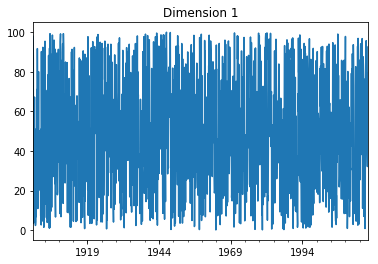

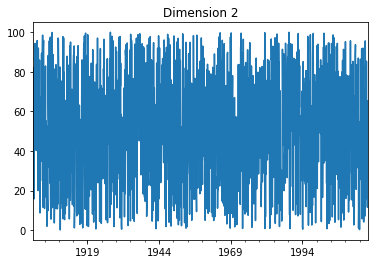

In [18]:
# Iterate through the columns and plot the data
for index in indices:
    # Convert the column to timeseries format
    timeseries = read_data(input_file, index)
    
    # Plot the figure
    plt.figure()
    timeseries.plot()
    print(timeseries.head())
    plt.title('Dimension ' + str(index - 1))
plt.show()